# Tutorial: Plots

__The goal of this assignment is to create 5 plots based on the Titanic dataset.__

Plots are a very useful tool to explore datasets and to present information to others.

You will use [Plotnine](https://plotnine.readthedocs.io/en/latest/index.html), a Python port of R `ggplot2` that provides 2D visualizations.

`ggplot2` is based on the [Grammar of Graphics](http://vita.had.co.nz/papers/layered-grammar.html), an algebra for plot components.

__Grade scale__: 10 points
- correct plot: 2 points
- incorrect plot: 0 points

__Further documentations__:
* https://ggplot2.tidyverse.org/reference/
* http://pbpython.com/python-vis-flowchart.html
* https://plotnine.readthedocs.io/en/latest/api.html
* https://www.kaggle.com/residentmario/grammar-of-graphics-with-plotnine-optional/#

![](https://i.imgur.com/UoIbtqI.png)

# Core

__VARIABLE DESCRIPTIONS__:

- __survival__        Survival(0 = No; 1 = Yes)
- __pclass__          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- __name__            Name
- __sex__             Sex
- __age__             Age
- __sibsp__           Number of Siblings/Spouses Aboard
- __parch__           Number of Parents/Children Aboard
- __ticket__          Ticket Number
- __fare__            Passenger Fare
- __cabin__           Cabin
- __embarked__        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
# import plotnine objects
from plotnine import *

# import pandas library
import pandas as pd

In [2]:
# load the dataset with pandas
df = pd.read_csv("titanic.csv.gz")

df.head()

,pclass,survival,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


# Examples

/home/jamber/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/jamber/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 264 rows containing missing values.


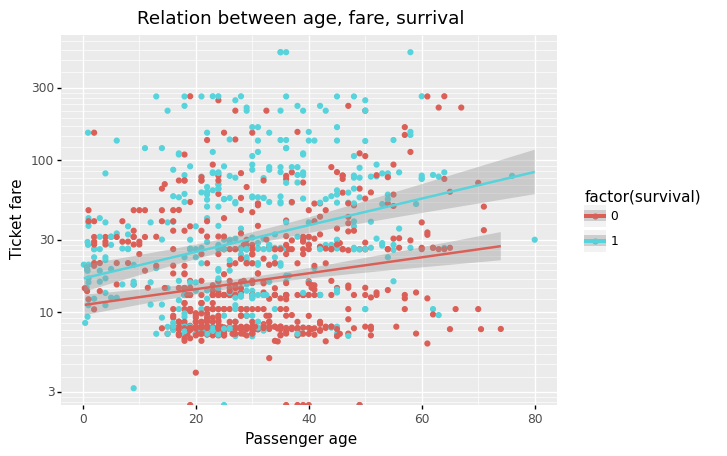

<ggplot: (8773676238933)>

In [3]:
# you must specify the source (df) and the variables (aes) to ggplot
plot = ggplot(df, aes(x="age", y="fare", color="factor(survival)"))
plot += ggtitle("Relation between age, fare, surrival")  # title
plot += xlab("Passenger age")  # x label
plot += ylab("Ticket fare")  # y label
plot += geom_point()  # as a scatter plot
plot += stat_smooth(method='lm')  # regression line
plot += scale_y_log10()  # scale y-axis with log scale
plot

# Questions

__IMPORTANT__: Your result should match the image included in the question !

__1. Create a bar plot that represents the distribution of the `embarked` variable.__

![](P1.png)

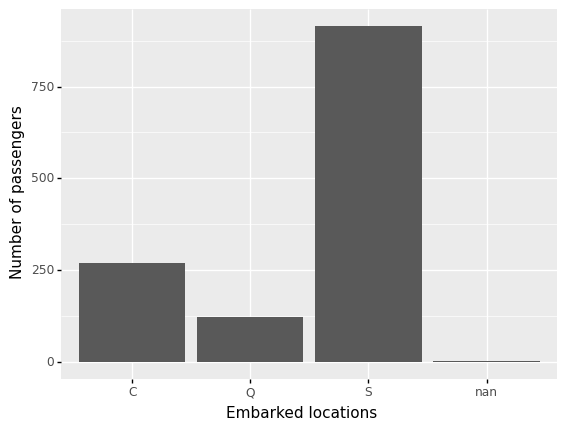

In [4]:
def Q1(df):
    plot = None
    ### BEGIN SOLUTION
    plot = ggplot(df, aes(x="embarked"))
    plot += xlab("Embarked locations")
    plot += ylab("Number of passengers")
    plot += geom_bar()
    print(plot)
    ### END SOLUTION

Q1(df)

__2. Create a jitter plot with a point size of 0.5 that represents the relation between `sibsp`, `parch` and `survival` variables__
- __note__: be careful about the y tick breaks !

![](P2.png)

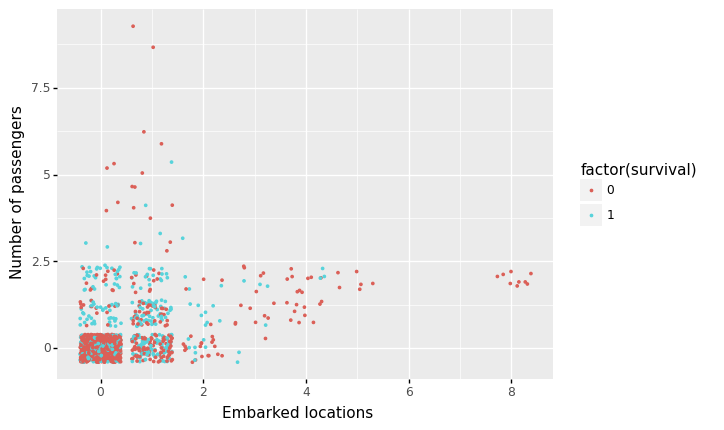

In [5]:
def Q2(df):
    plot = None
    ### BEGIN SOLUTION
    plot = ggplot(df, aes(x="sibsp", y="parch", color="factor(survival)"))
    plot += xlab("Embarked locations")
    plot += ylab("Number of passengers")
    plot += geom_jitter(size=0.5)
    print(plot)
    ### END SOLUTION
    
Q2(df)

__3. Create a box plot with 'red' outlier color and variable width to show the relation between `pclass` (x-axis) and `age` (y-axis) variables__
- __note__: the outlier color must be 'red', not '#FF0000' or other alternatives
- __hint__: you can use the factor() function for the aes to group values by plass

![](P3.png)

/home/jamber/.local/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 263 rows containing non-finite values.


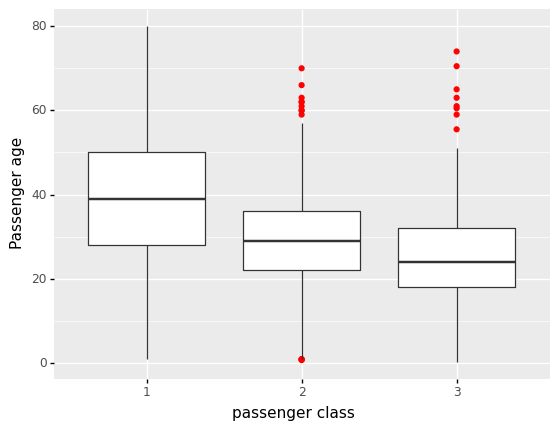

In [6]:
def Q3(df):
    plot = None
    ### BEGIN SOLUTION
    plot = ggplot(df, aes(x="factor(pclass)", y="age"))
    plot += xlab("passenger class")
    plot += ylab("Passenger age")
    plot += geom_boxplot(outlier_color="red")
    print(plot)
    ### END SOLUTION
    
Q3(df)

__4. Create a stacked histogram with 20 bins that shows the distribution of passenger `age` (x) according to `survival` (fill)__

![](P4.png)

/home/jamber/.local/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 263 rows containing non-finite values.


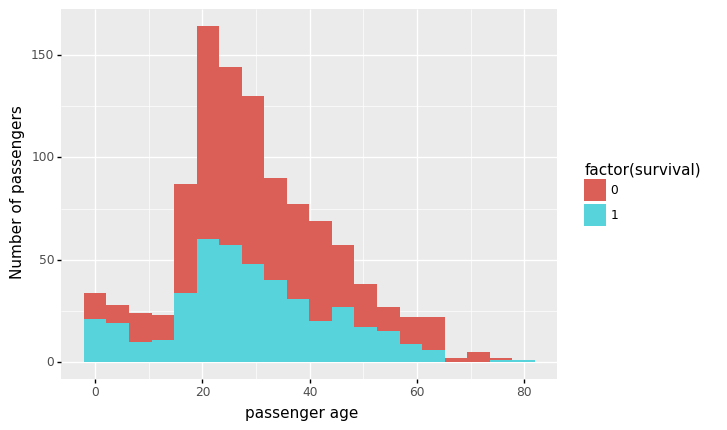

In [7]:
def Q4(df):
    plot = None
    ### BEGIN SOLUTION
    plot = ggplot(df,aes(x="age", fill="factor(survival)"))
    plot += xlab("passenger age")
    plot += ylab("Number of passengers")
    plot += geom_histogram(bins=20)
    
    print(plot)
    ### END SOLUTION
    
Q4(df)

__5. Create a heatmap plot that shows the number of passenger per `sex` (x-axis) and `pclass` (y-axis)__
- __hint__: you might have to create a new dataframe to aggregate the number of passengers
- __note__: name the aggregated variable 'count' and use geom_tile

![](P5.png)

In [26]:
def Q5(df):
    plot = None
    ### BEGIN SOLUTION
    count = df[['pclass', 'sex']].value_counts().tolist()
    print(count)
    plot = ggplot(df[['pclass', 'sex']], aes(x="sex", y="pclass", fill="factor(count)"))
    plot += xlab("passenger age")
    plot += ylab("Number of passengers")
    plot += geom_tile()
    print(plot)    
    ### END SOLUTION
    
Q5(df)

[493, 216, 179, 171, 144, 106]


PlotnineError: "The 'fill' mapping: 'factor(count)' produced a value of type '<class 'pandas.core.arrays.categorical.Categorical'>',but only single items and lists/arrays can be used. (original error: Length of values (6) does not match length of index (1309))"